In [1]:
import scipy.optimize as opt
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from PIL import Image
%matplotlib notebook

In [2]:
def get_image(image_path, scale):
    """Get a numpy array of an image so that one can access values[x][y]."""
    image = Image.open(image_path, "r")
    width, height = image.size
    l = max(width, height)
    c = l/scale
    x = np.linspace(0, c, l)
    x, y = np.meshgrid(x, x)
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = np.array(pixel_values).reshape((width, height, channels))
    return pixel_values, x, y, width, height, l, c


In [3]:
def twoD_Gaussian(mesh, amplitude, x_0, y_0, sigma, offset):
    (x, y) = mesh
    x_0 = float(x_0)
    y_0 = float(y_0)
    g = offset + amplitude*np.exp(-0.5*(((x-x_0)**2) + ((y-y_0)**2))/(sigma**2))
    return g.ravel()

In [4]:
def analysis(filename, scale):
    im, x, y, width, height, l, c = get_image(filename, scale)
    R = im[:,:,0]
    R = R.reshape(width, height)
    if height < width:
        buffer = np.zeros((l,l-height))
        R = np.concatenate((R,buffer), axis=1)
    elif width > height:
        buffer = np.zeros((l-width,l))
        R = np.concatenate((R,buffer), axis=0)
    else:
        pass
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, R, cmap="magma")
    ax.set_xlabel("X-coordinate (cm)")
    ax.set_ylabel("Y-coordinate (cm)")
    ax.set_zlabel("R")
    ax.set_title("3D Intensity profile in red channel at {}".format(filename.split("_")[0]))
    plt.savefig("{}_3D_intensity_profile.jpg".format(filename.split("_")[0]))
    plt.show()
    
    data = R.ravel()
    plt.figure()
    plt.imshow(data.reshape(l,l), extent=[0,c,0,c], cmap=plt.cm.jet)
    plt.colorbar(label="R")
    plt.xlabel("X-coordinate (cm)")
    plt.ylabel("Y-coordinate (cm)")
    plt.title("2D Intensity profile in red channel at {}".format(filename.split("_")[0]))
    plt.savefig("{}_2D_intensity_profile.jpg".format(filename.split("_")[0]))
    plt.show()
    
    initial_guess = (150,c/2,c/2,1,100)
    popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), data, p0=initial_guess)
    
    data_fitted = twoD_Gaussian((x, y), *popt)
    fig, ax = plt.subplots(1, 1)
    ax.imshow(data.reshape(l, l), cmap=plt.cm.jet, extent=[0,c,0,c])
    ax.contour(x, y, data_fitted.reshape(l, l), 8, colors='black')
    ax.set_xlabel("X-coordinate (cm)")
    ax.set_ylabel("Y-coordinate (cm)")
    ax.set_title("Gaussian Fitting for {}".format(filename.split("_")[0]))
    plt.savefig("{}_Gaussian_Fitting.jpg".format(filename.split("_")[0]))
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, data_fitted.reshape(l, l), cmap="magma")
    ax.set_xlabel("X-coordinate (cm)")
    ax.set_ylabel("Y-coordinate (cm)")
    ax.set_zlabel("R")
    ax.set_title("Gaussian Fit surface plot for {}".format(filename.split("_")[0]))
    plt.savefig("{}_Gaussian_Fit_surface_plot.jpg".format(filename.split("_")[0]))
    plt.show()
    rms = (np.sqrt(np.sum((data_fitted-data)**2)/(l**2)))
    r_sq = 1 - (np.sum((data_fitted-data)**2)/np.sum((data-np.mean(data))**2))
    return np.sqrt(4*(popt[3])**2), rms, r_sq, popt, pcov

<IPython.core.display.Javascript object>


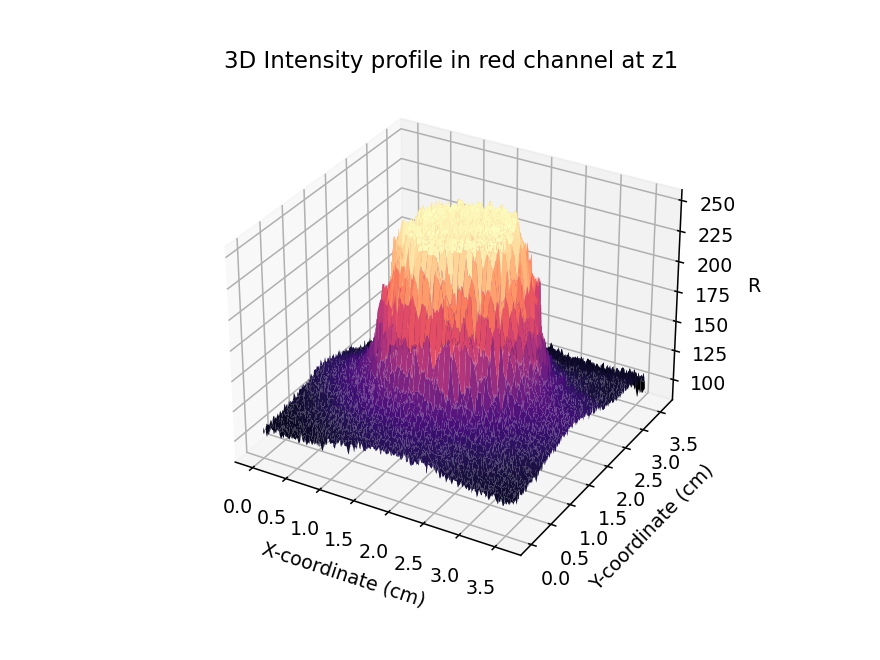

<IPython.core.display.Javascript object>


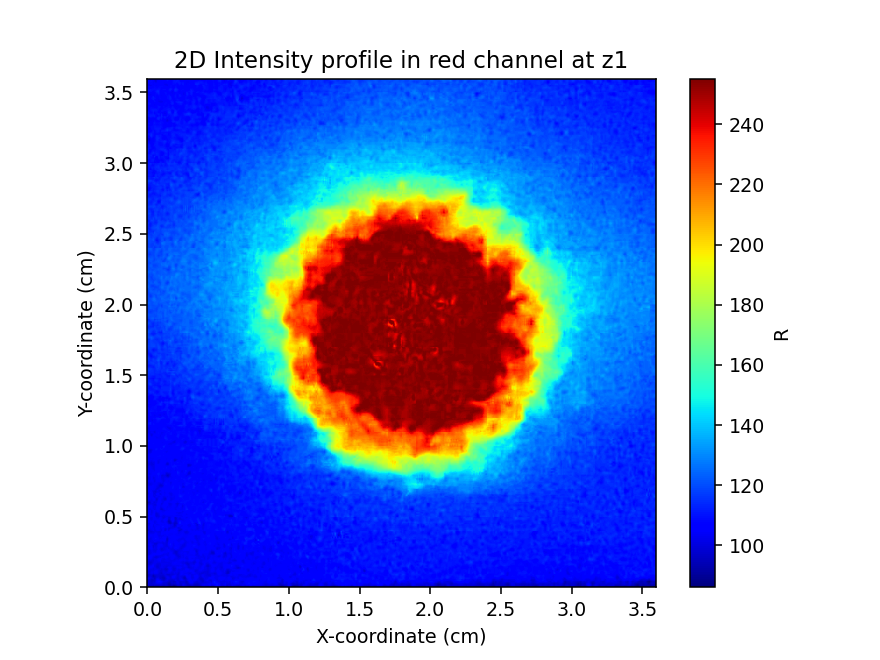

<IPython.core.display.Javascript object>


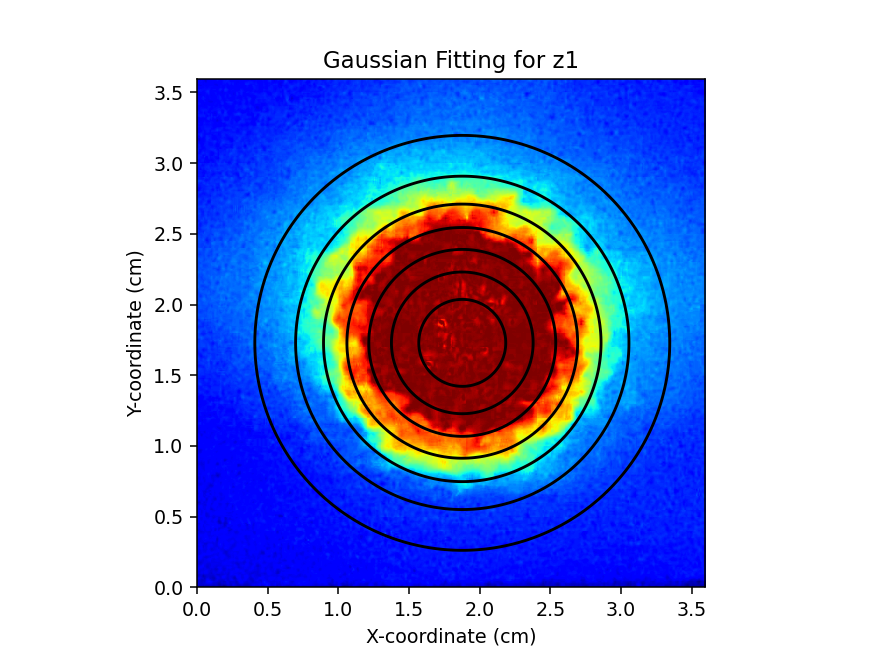

<IPython.core.display.Javascript object>


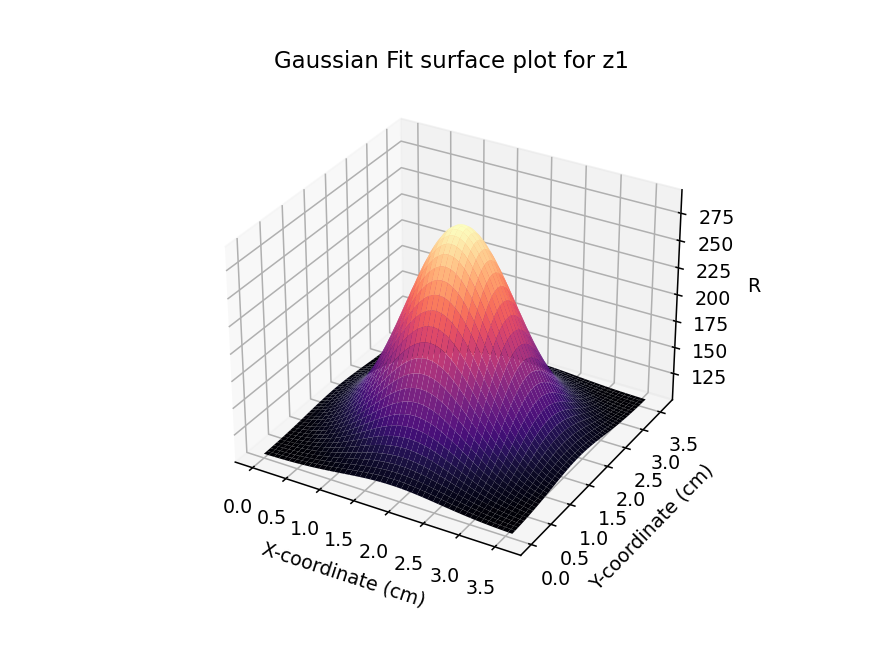

In [5]:
w1, rms1, r_sq1, popt1, pcov1 = analysis("z1_new.jpg",160)

<IPython.core.display.Javascript object>


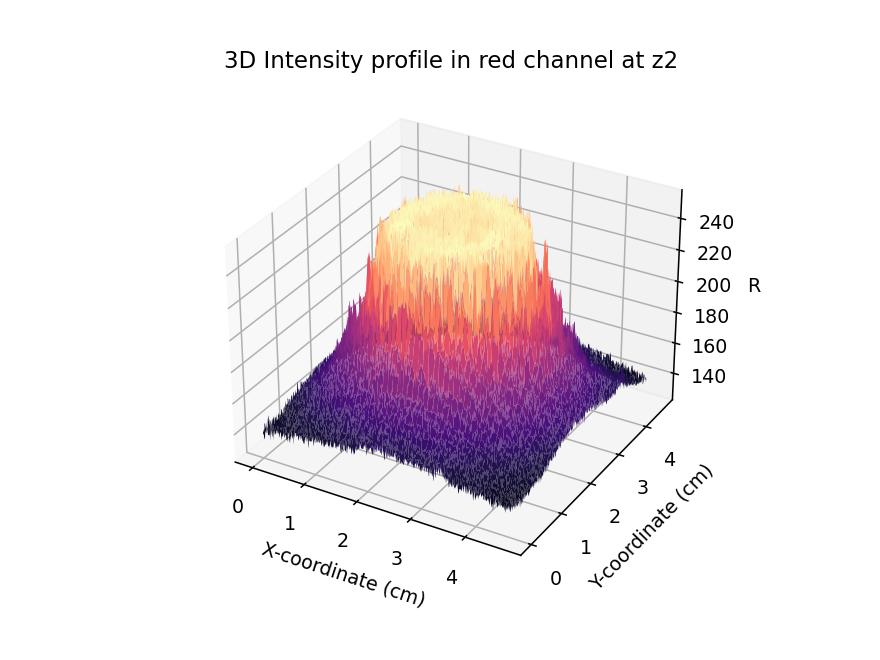

<IPython.core.display.Javascript object>


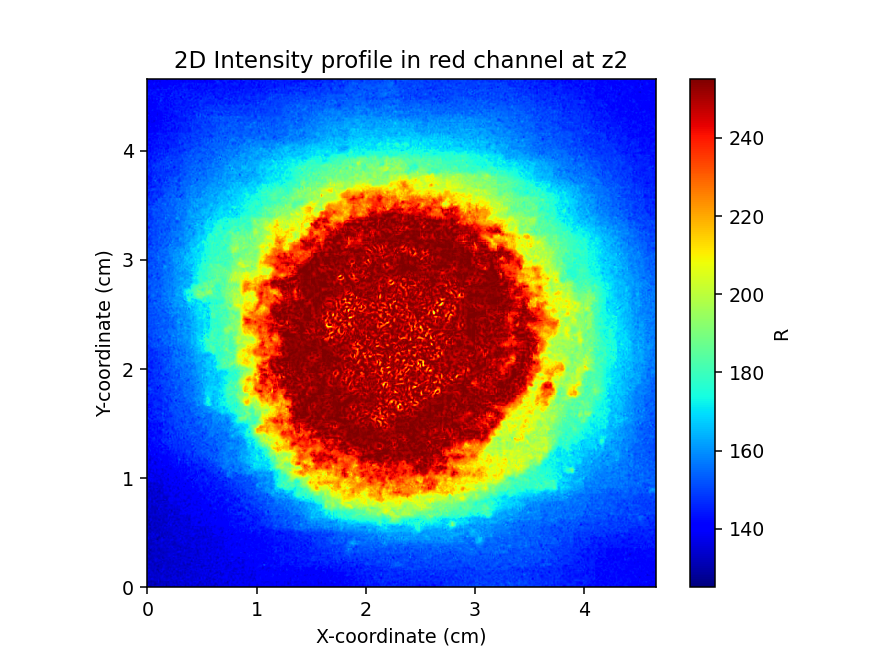

<IPython.core.display.Javascript object>


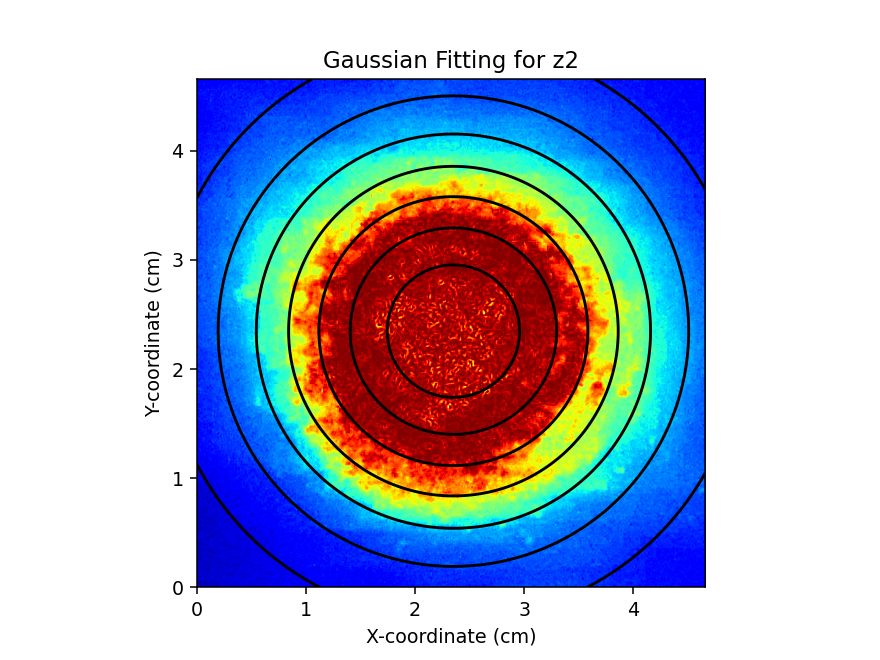

<IPython.core.display.Javascript object>


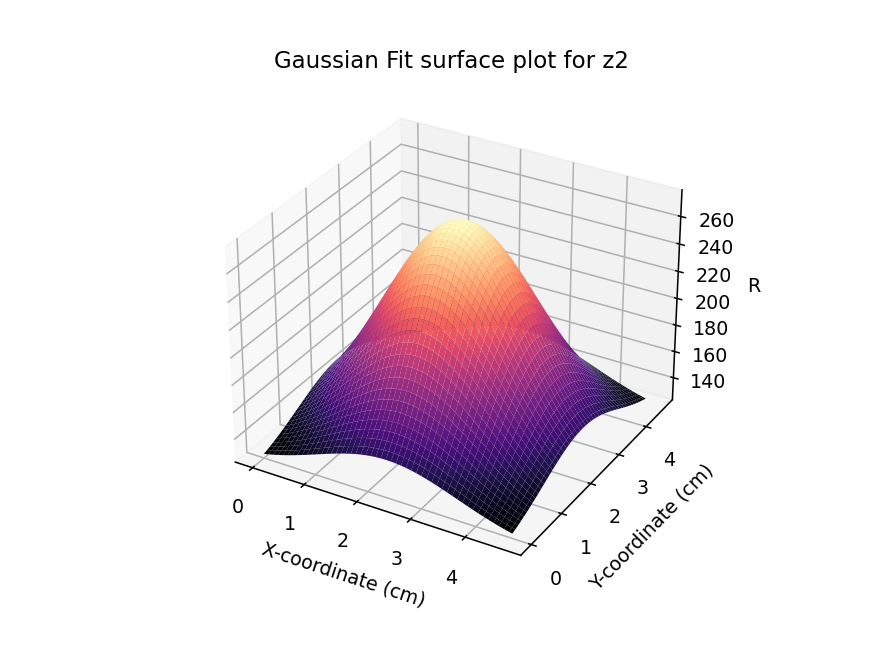

In [6]:
w2, rms2, r_sq2, popt2, pcov2 = analysis("z2_new.jpg",160)

<IPython.core.display.Javascript object>


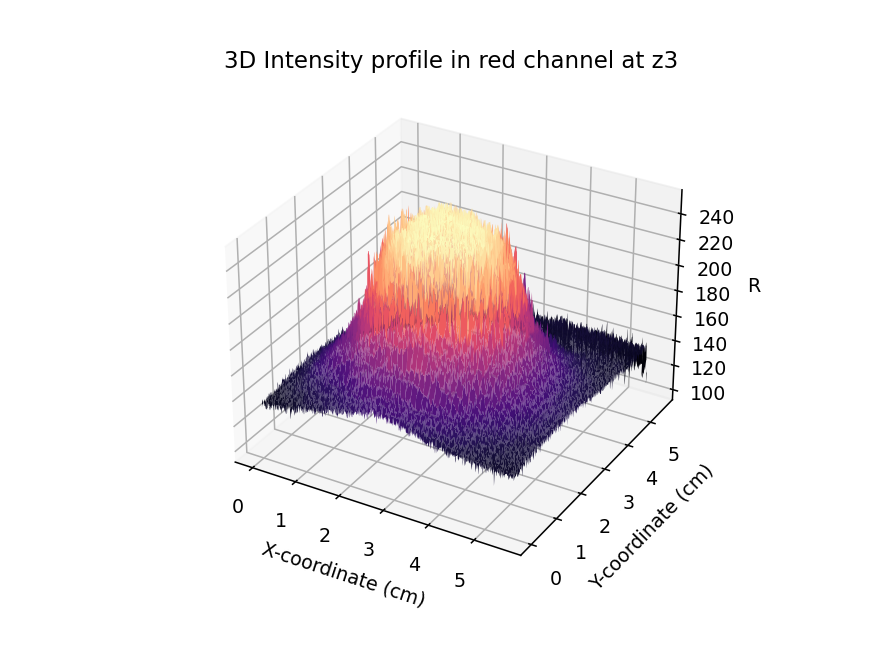

<IPython.core.display.Javascript object>


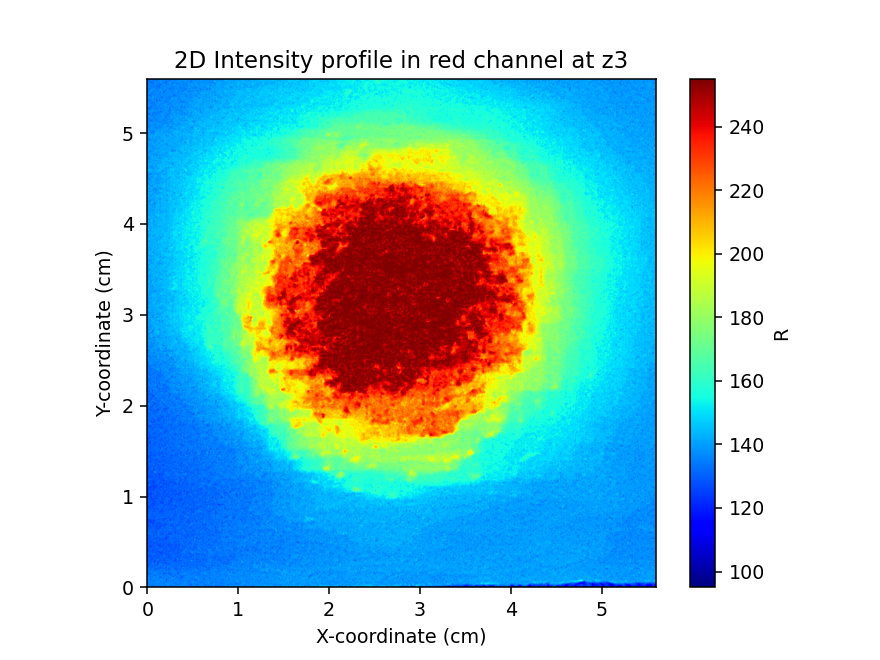

<IPython.core.display.Javascript object>


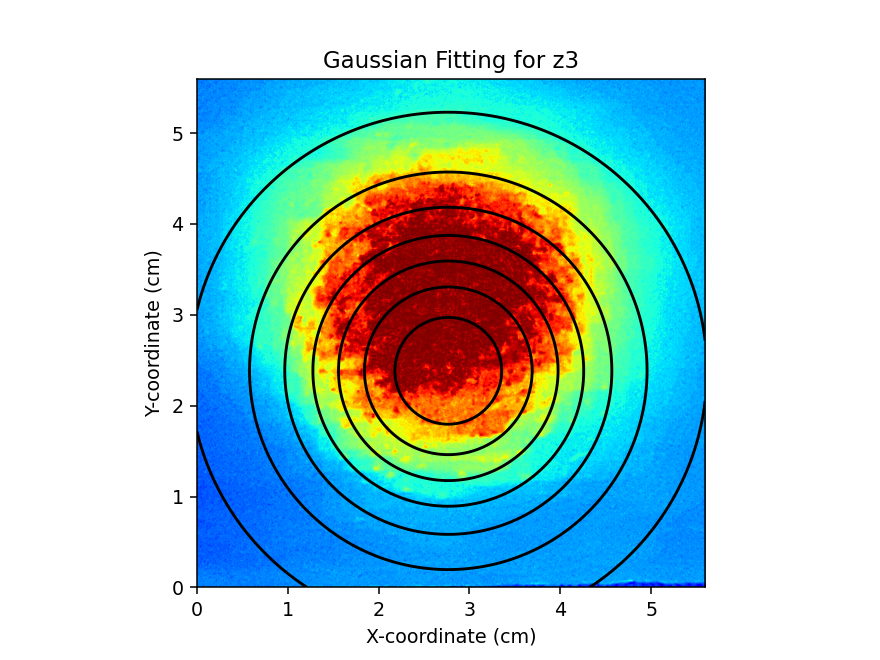

<IPython.core.display.Javascript object>


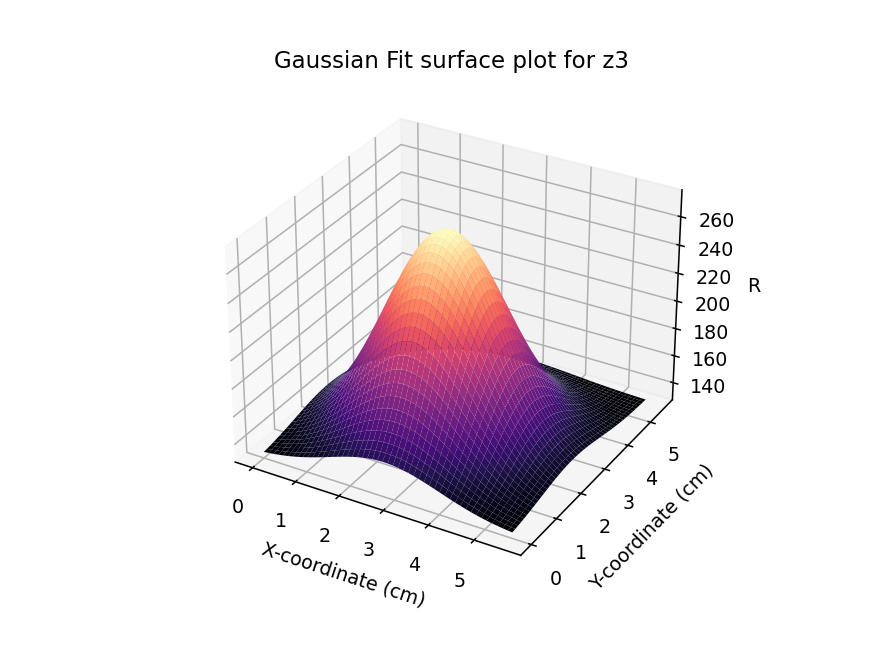

In [7]:
w3, rms3, r_sq3, popt3, pcov3 = analysis("z3_new.jpg",236)

<IPython.core.display.Javascript object>


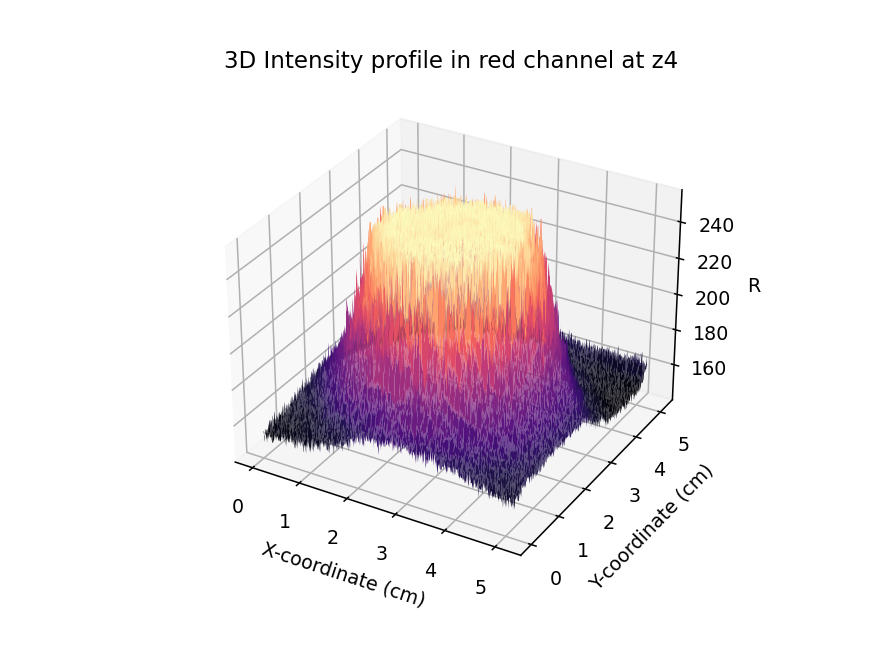

<IPython.core.display.Javascript object>


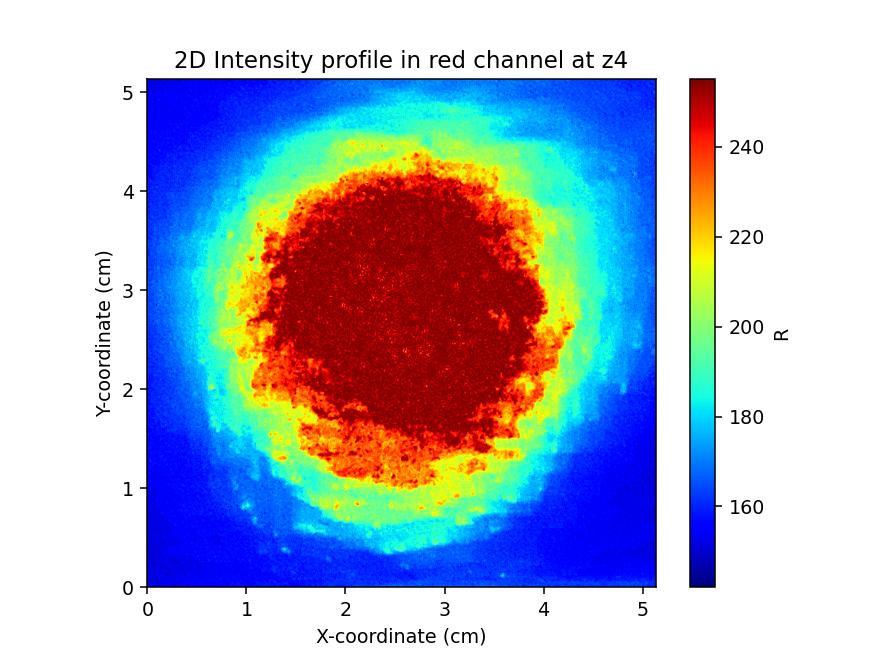

<IPython.core.display.Javascript object>


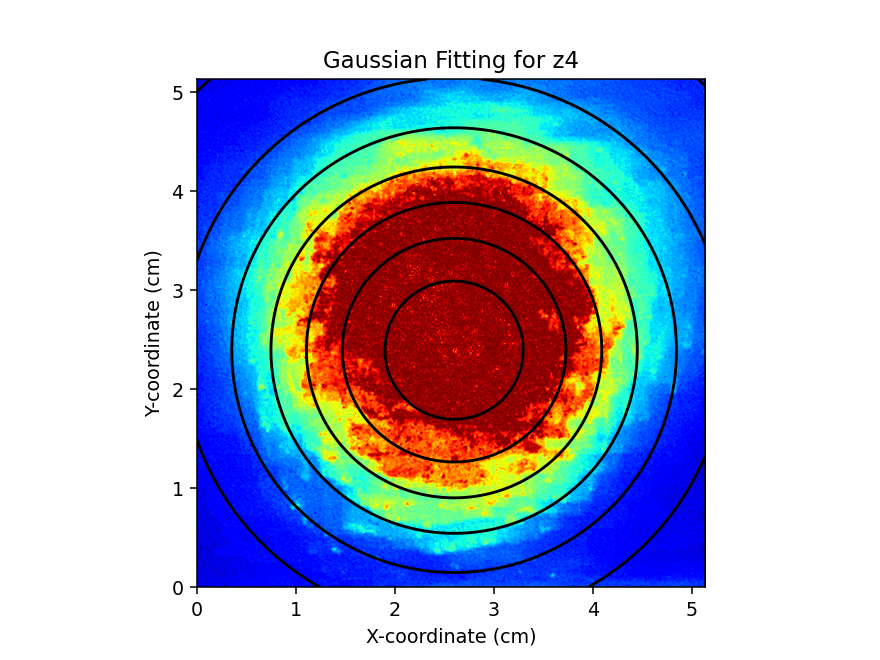

<IPython.core.display.Javascript object>


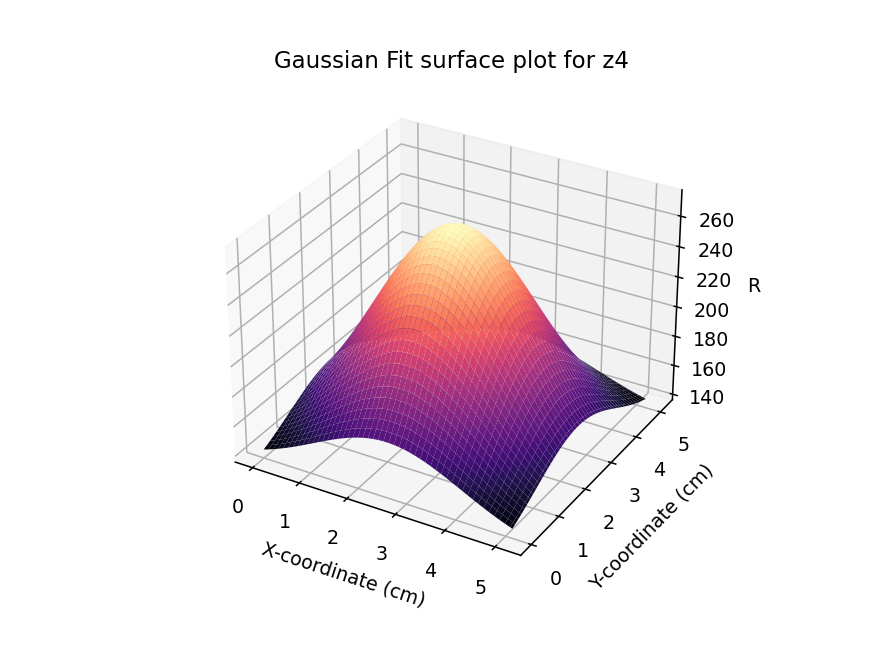

In [8]:
w4, rms4, r_sq4, popt4, pcov4 = analysis("z4_new.jpg",236)

In [9]:
print("w(z1) =", w1, "cm")
print("w(z2) =", w2, "cm")
print("w(z3) =", w3, "cm")
print("w(z4) =", w4, "cm")

w(z1) = 1.4097891328612377 cm
w(z2) = 2.614863530550012 cm
w(z3) = 2.4631081312127363 cm
w(z4) = 3.0368550386562196 cm


In [46]:
print("Root mean squared error for z1 =", rms1)
print("Root mean squared error for z2 =", rms2)
print("Root mean squared error for z3 =", rms3)
print("Root mean squared error for z4 =", rms4)

Root mean squared error for z1 = 13.202312326637943
Root mean squared error for z2 = 11.286342871310694
Root mean squared error for z3 = 7.887848068630636
Root mean squared error for z4 = 9.502495868079983


In [47]:
print("Coefficient of determination for z1 =", r_sq1)
print("Coefficient of determination for z2 =", r_sq2)
print("Coefficient of determination for z3 =", r_sq3)
print("Coefficient of determination for z4 =", r_sq4)

Coefficient of determination for z1 = 0.9298868479311381
Coefficient of determination for z2 = 0.9224667491681414
Coefficient of determination for z3 = 0.9589927045109969
Coefficient of determination for z4 = 0.9301858936509008


In [13]:
print("Optimized parameters for z1\n",popt1)
print("Parameter errors for z1\n",np.sqrt(np.diag(pcov1)))

Optimized parameters for z1
 [188.7823808    1.87663622   1.72927172   0.70489457 103.35078843]
Parameter errors for z1
 [0.09508    0.00035035 0.00035032 0.00041237 0.05135491]


In [14]:
print("Optimized parameters for z2\n",popt2)
print("Parameter errors for z2\n",np.sqrt(np.diag(pcov2)))

Optimized parameters for z2
 [155.99389659   2.35021703   2.34789602   1.30743177 119.92284757]
Parameter errors for z2
 [0.07427818 0.00038215 0.00038214 0.00089734 0.08565045]


In [15]:
print("Optimized parameters for z3\n",popt3)
print("Parameter errors for z3\n",np.sqrt(np.diag(pcov3)))

Optimized parameters for z3
 [145.76528366   2.76685706   2.38375917   1.23155407 129.90416401]
Parameter errors for z3
 [0.02306247 0.00018487 0.0001866  0.00025218 0.01638387]


In [16]:
print("Optimized parameters for z4\n",popt4)
print("Parameter errors for z4\n",np.sqrt(np.diag(pcov4)))

Optimized parameters for z4
 [141.70138459   2.59707684   2.39537784   1.51842752 132.50601637]
Parameter errors for z4
 [0.04358917 0.00024502 0.00024651 0.0006413  0.05107643]
